In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from scipy import stats


#***
#from impyute.imputation.cs import fast_knn
#from impyute.imputation.cs import mice
import xport

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVR, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

from pandas.plotting import scatter_matrix

## Import data

In [2]:
# function:  rename_chosen_features(xpt_file,old_names,new_names,csv_file)
# purpose:   rename the chosen features in the XPT file
# input:     xpt_file: the converted dataframe from XPT file
#            old_names: a list of strings - strings are code names on NHANES 
#            new_names: a list of strings 
#            csv_file: name 
# output:    a dataframe with renamed chosen features  

def rename_chosen_features(xpt_file,old_names,new_names,csv_file):
    df = xpt_file[old_names]        
    df.columns = new_names                
    # xpt_file.to_csv(csv_file, header=False) # if needs to get a csv file from the original xpt file
    return df

In [3]:
datadir = 'data/'

## Diebetes 
DIQ_xpt_file = pd.read_sas(datadir+'DIQ_I1516.XPT')
DIQ_cvs_file = datadir+'Diabetes1516.csv'
# DIQ010: doctor told you have diabetes
DIQ_old_names = ['SEQN','DIQ010'] 
DIQ_new_names = ['ID','diabetes']
df0_DIQ = rename_chosen_features(DIQ_xpt_file,DIQ_old_names,DIQ_new_names,DIQ_cvs_file)

## Demographics
DEMO_xpt_file = pd.read_sas(datadir+'DEMO_I1516.XPT')
DEMO_cvs_file = datadir+'Demographic1516.csv'
# RIAGENDR: gender - codes
# RIDRETH3: race/Hispanic origin w/ NH Asian - codes
# RIDAGEYR: age in years at screening - values & codes: 0 to 79 & 80
DEMO_old_names = ['SEQN','RIAGENDR','RIDRETH3','RIDAGEYR']
DEMO_new_names = ['ID','gender','race','age']
df0_DEMO = rename_chosen_features(DEMO_xpt_file,DEMO_old_names,DEMO_new_names,DEMO_cvs_file)

## Plasma Fasting Glucose
GLU_xpt_file = pd.read_sas(datadir+'GLU_I1516.XPT')
GLU_cvs_file = datadir+'FastingGlucose1516.csv'
# LBDGLUSI: Fasting Glucose (mmol/L) - values: 1.17 to 26.6
GLU_old_names = ['SEQN','LBDGLUSI'] 
GLU_new_names = ['ID','fasting_glucose']
df0_GLU = rename_chosen_features(GLU_xpt_file,GLU_old_names,GLU_new_names,GLU_cvs_file)

## Physical Activity
PAQ_xpt_file = pd.read_sas(datadir+'PAQ_I1516.XPT')
PAQ_cvs_file = datadir+'PhysicalActivity1516.csv'
# PAD680: Minutes sedentary activity - values: 0 to 1380 (time spent sitting/day)
PAQ_old_names = ['SEQN','PAD680'] 
PAQ_new_names = ['ID','sitting']
df0_PAQ = rename_chosen_features(PAQ_xpt_file,PAQ_old_names,PAQ_new_names,PAQ_cvs_file)

## Sleep Disorders
SLQ_xpt_file = pd.read_sas(datadir+'SLQ_I1516.XPT')
SLQ_cvs_file = datadir+'SleepDisorder1516.csv'
# SLD012: Sleep hours/day - values: 2 to 14.5
SLQ_old_names = ['SEQN','SLD012'] 
SLQ_new_names = ['ID','sleeping']
df0_SLQ = rename_chosen_features(SLQ_xpt_file,SLQ_old_names,SLQ_new_names,SLQ_cvs_file)

## Alcohol Use
ALQ_xpt_file = pd.read_sas(datadir+'ALQ_I1516.XPT')
ALQ_cvs_file = datadir+'AlcoholUse1516.csv'
# ALQ101: Had at least 12 alcohol drinks/1 yr? - codes
# ALQ151: Ever have 4/5 or more drinks every day? - codes
# ALQ160: # days have 4/5 or more drinks in 2 hrs? - codes & values
ALQ_old_names = ['SEQN','ALQ101','ALQ151','ALQ160'] 
ALQ_new_names = ['ID','12drinksayear','5drinksaday','5drinks2hours']
df0_ALQ = rename_chosen_features(ALQ_xpt_file,ALQ_old_names,ALQ_new_names,ALQ_cvs_file)

## Cholesterol
TRIGLY_xpt_file = pd.read_sas(datadir+'TRIGLY_I1516.XPT')
TRIGLY_cvs_file = datadir+'Cholesterol1516.csv'
# LBDLDL: LDL-cholesterol (mg/dL) - values: 23 to 277
TRIGLY_old_names = ['SEQN','LBDLDL']  
TRIGLY_new_names = ['ID','LDL']
df0_TRIGLY = rename_chosen_features(TRIGLY_xpt_file,TRIGLY_old_names,TRIGLY_new_names,TRIGLY_cvs_file)

## Blood Pressure
BPX_xpt_file = pd.read_sas(datadir+'BPX_I1516.XPT')
BPX_cvs_file = datadir+'BloodPressure1516.csv'
# BPXSY1: Systolic: Blood pres (1st rdg) mm Hg - values: 72 to 236
# BPXDI1: Diastolic: Blood pres (1st rdg) mm Hg - values: 0 to 120
# BPXSY2: Systolic: Blood pres (2nd rdg) mm Hg - values: 76 to 238
# BPXDI2: Diastolic: Blood pres (2nd rdg) mm Hg - values: 0 to 144
# BPXSY3 - Systolic: Blood pres (3rd rdg) mm Hg - values: 76 to 226 
# BPXDI3 - Diastolic: Blood pres (3rd rdg) mm Hg - values: 0 to 140
BPX_old_names = ['SEQN','BPXSY1','BPXDI1','BPXSY2','BPXDI2','BPXSY3','BPXDI3']  
BPX_new_names = ['ID','sysBP1', 'diaBP1','sysBP2', 'diaBP2','sysBP3', 'diaBP3']
df0_BPX = rename_chosen_features(BPX_xpt_file,BPX_old_names,BPX_new_names,BPX_cvs_file)

## Body Measures
BMX_xpt_file = pd.read_sas(datadir+'BMX_I1516.XPT')
BMX_cvs_file = datadir+'BMI1516.csv'
# BMXBMI: Body Mass Index (kg/m**2) - values: 11.5 to 67.3
BMX_old_names = ['SEQN','BMXBMI']  
BMX_new_names = ['ID','BMI']
df0_BMX = rename_chosen_features(BMX_xpt_file,BMX_old_names,BMX_new_names,BMX_cvs_file)

## Total Dietary Supplements 
DSQTOT_xpt_file = pd.read_sas(datadir+'DSQTOT_I1516.XPT')
DSQTOT_cvs_file = datadir+'Sugar1516.csv'
# DSQTSUGR - Total sugars (gm) - values: 0.02 to 45.73 (in 30 days)
DSQTOT_old_names = ['SEQN','DSQTSUGR']  
DSQTOT_new_names = ['ID','sugar']
df0_DSQTOT = rename_chosen_features(DSQTOT_xpt_file,DSQTOT_old_names,DSQTOT_new_names,DSQTOT_cvs_file)

In [4]:
df0 = pd.merge(df0_ALQ, df0_BMX, how ="inner", on = "ID")
df0 = pd.merge(df0, df0_BPX, how = "inner", on ="ID")
df0 = pd.merge(df0,df0_DEMO, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DIQ, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_DSQTOT, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_GLU, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_PAQ, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_SLQ, how = 'inner', on = "ID")
df0 = pd.merge(df0,df0_TRIGLY, how = 'inner', on = "ID")
df0.head()
# df0.info()

,ID,12drinksayear,5drinksaday,5drinks2hours,BMI,sysBP1,diaBP1,sysBP2,diaBP2,sysBP3,diaBP3,gender,race,age,diabetes,sugar,fasting_glucose,sitting,sleeping,LDL
0,83733.0,1.0,1.0,5.397605e-79,30.8,146.0,88.0,140.0,88.0,134.0,82.0,1.0,3.0,53.0,2.0,NaN,5.59,300.0,8.0,173.0
1,83734.0,1.0,1.0,NaN,28.8,138.0,46.0,132.0,44.0,136.0,46.0,1.0,3.0,78.0,1.0,NaN,4.66,480.0,7.0,145.0
2,83736.0,2.0,2.0,NaN,20.3,100.0,70.0,114.0,54.0,98.0,56.0,2.0,4.0,42.0,2.0,NaN,4.66,540.0,NaN,142.0
3,83737.0,2.0,NaN,NaN,28.6,116.0,58.0,122.0,58.0,120.0,60.0,2.0,1.0,72.0,2.0,NaN,5.93,10.0,9.0,103.0
4,83741.0,1.0,1.0,2.000000e+00,28.0,110.0,70.0,112.0,74.0,112.0,74.0,1.0,4.0,22.0,2.0,NaN,5.27,540.0,6.5,102.0


* Set index

In [5]:
# set SEQN to index of the df0
df0.set_index('ID', inplace=True)      

# if has duplicated indexs(ID), keep the first one 
df0 = df0[~df0.index.duplicated(keep='first')] 

* Create a copy of dataframe df0 (the original data input), all modifications will be done on the copy dataframe df    

In [6]:
df0 = df0.reindex(sorted(df0.columns), axis=1)
df0.head()
df = df0.copy(deep=True)
df.head()

,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diaBP1,diaBP2,diaBP3,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP1,sysBP2,sysBP3
ID,,,,,,,,,,,,,,,,,,,
83733.0,1.0,5.397605e-79,1.0,30.8,173.0,53.0,88.0,88.0,82.0,2.0,5.59,1.0,3.0,300.0,8.0,NaN,146.0,140.0,134.0
83734.0,1.0,NaN,1.0,28.8,145.0,78.0,46.0,44.0,46.0,1.0,4.66,1.0,3.0,480.0,7.0,NaN,138.0,132.0,136.0
83736.0,2.0,NaN,2.0,20.3,142.0,42.0,70.0,54.0,56.0,2.0,4.66,2.0,4.0,540.0,NaN,NaN,100.0,114.0,98.0
83737.0,2.0,NaN,NaN,28.6,103.0,72.0,58.0,58.0,60.0,2.0,5.93,2.0,1.0,10.0,9.0,NaN,116.0,122.0,120.0
83741.0,1.0,2.000000e+00,1.0,28.0,102.0,22.0,70.0,74.0,74.0,2.0,5.27,1.0,4.0,540.0,6.5,NaN,110.0,112.0,112.0


# Process data
* Set small values to be zeros: clean_epsilon

In [7]:
# function:  clean_epsilon(cell)
# purpose:   in the orginal files, zeros are represented by a small value (10^-79), convert them to actual zeros
# input:     a dataframe that with (10^-79) as zeroes 
# output:    a dataframe with actual zeroes 

def clean_epsilon(cell):
    if cell - 0.0 < 0.0001:
        return 0
    return cell

df = df.applymap(clean_epsilon)

* Handle response: don't know & refuse (refer as constraint - cstr)

In [8]:
# function:  get_cstr_ratio(df,feature,cstr)
# purpose:   get the percentage of 'don't know' and 'refuse' out of number of entries
# input:     cstr: a list of two integers. ex: [77,99] 
# output:    ratios of dk/entries and refuse/entries 

def get_cstr_ratio(df,feature,cstr):
    total_count = df.shape[0]
    dk = cstr[0]      # don't know
    refuse = cstr[1]  # refuse to answer
    
    feature_counts = df[feature].value_counts().to_dict()
    if dk not in feature_counts: dk = 0         # When there's no 'dk'/'refuse' in responses
    else: dk = feature_counts[dk]
    if refuse not in feature_counts: refuse = 0
    else: refuse = feature_counts[refuse]

    dk = int(dk)
    refuse = int(refuse)
    r1 = dk/total_count
    r2 = refuse/total_count
    print()
    print('The ratio of [dont know] is', r1)
    print('The ratio of [refuse] is', r2)
    print('Now call: process_cstr(df,feature,cstr,method)')

# function:  process_cstr(df,feature,cstr,method)
# purpose:   if cstr ratio is high, then replace cstr with NaN and deal with NaN later
#            if cstr ratio is low, then drop entries with cstr
# input:     cstr: a list of two integers. ex: [77,99]
#            method: select among 'drop', 'NaN'
# output:    

def process_cstr(df,feature,cstr,method):
    dk = cstr[0] # don't know
    refuse = cstr[1]  # refuse to answer
    if method == 'drop':
        df = df[df[feature] != dk]
        df = df[df[feature] != refuse]
    elif method == 'NaN':
        df[feature][df[feature] == dk] = np.nan
        df[feature][df[feature] == refuse] = np.nan
    else:
        print('The method you choose is not included yet, add new method now!')
    return df

In [9]:
def get_value_count(df,feature): 
    print()
    print('NaN   ',df[feature].isna().sum())
    print(df[feature].value_counts())


# Dealing with missing values
1. Get missing values information

        A. Get the ratio of missing values
        B. Visualize abundances of missing values between different features
2. Fill or predict missing values
    
        A. Fill NaN will mean/mode
        B. Predict NaN with machine learning algorithms

### 1. Learn about NaN
Learn about the percentage of NaN/non-NaN, then decide how to proceed

In [10]:
# function:  get_NaN_ratio_for_one_feature(df,feature)
# purpose:   get the ratio of (missing values)/(total entries) for ***one feature***  
# input:     df: dataframe that contains the feature you want to check for NaN ratio
#            feature: the name of the feature - string           
# output:    NaN ratio of the feature, and instructions on what to do next 

def get_NaN_ratio(df,feature):
    print()
    total_count = df.shape[0]                  # total entries
    feature_valid_count = df[feature].count()  # non-NaN entries for chosen feature
    feature_null_count = total_count - feature_valid_count
    NaN_ratio = feature_null_count/total_count
    print('The NaN ratio in',feature,'is',"%.3f" % NaN_ratio)
    if NaN_ratio == 0:
        print('No missing values detected')
    elif NaN_ratio <= 0.1:
        print('Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category')
        print('Now call function: fill_NaN(df, feature, fill_type)')
    else:
        print('Since NaN ratio is large, predict NaN using ML or check predictability first...')
        print('if check predictability, call: check_predictability_all/some_x(df,y,method)')
        print('if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)')

# features = df.columns.values.tolist()
# for feature in features:
#     get_NaN_ratio(df,feature)
#     print('----------------------')

def plot_NaN_percentage_for_all(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    # missing_data.head()
    f, ax = plt.subplots(figsize=(15, 6))
    plt.xticks(rotation='90')
    sns.barplot(x=missing_data.index, y=missing_data['Percent'])
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)


<class 'pandas.core.frame.DataFrame'>
Float64Index: 2729 entries, 83733.0 to 93697.0
Data columns (total 19 columns):
12drinksayear      2479 non-null float64
5drinks2hours      646 non-null float64
5drinksaday        2022 non-null float64
BMI                2696 non-null float64
LDL                2339 non-null float64
age                2729 non-null float64
diaBP1             2570 non-null float64
diaBP2             2646 non-null float64
diaBP3             2632 non-null float64
diabetes           2729 non-null float64
fasting_glucose    2573 non-null float64
gender             2729 non-null float64
race               2729 non-null float64
sitting            2723 non-null float64
sleeping           2716 non-null float64
sugar              241 non-null float64
sysBP1             2570 non-null float64
sysBP2             2646 non-null float64
sysBP3             2632 non-null float64
dtypes: float64(19)
memory usage: 426.4 KB


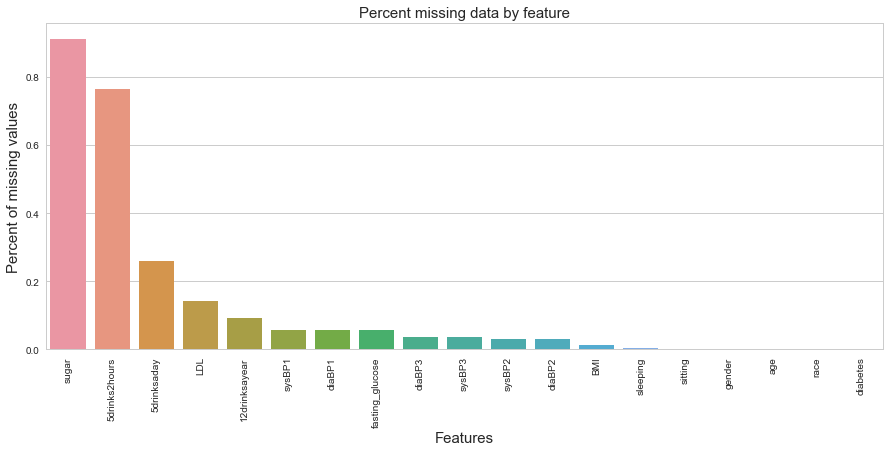

In [11]:
plot_NaN_percentage_for_all(df)
df.info()

### 2. Deal with NaN
   
    2.1 replace NaN with mean/median/average/mode: if NaN percentage is smaller than 10 %; suitable for simple linear models, not good for tree based methods; ignore relationship between the imputed variable and other variables
    2.2 replace NaN with values close to the mean value but within one standard deviation.
    2.3 drop NaN entries
    2.4 replace NaN with another category: use a constant value to group NaN as a separate category
    2.5 predict NaN using ML
    2.6 Adding new feature isnull: Adding new feature isnull indicating which rows have missing values for this feature. pro: tree based methods can understand that there was a missing value. con: double the number of features.

     

In [12]:
# function:  plot_before_after(feature0, feature, title)
# purpose:   Plot histograms showing the distribution of a feature before and after filling NaN
#            to see the change in distribution. This can tell you if the filling method is 
#            correct or not.
# input:     feature0: str0
#            feature: str
#            title of the plot

def plot_before_after(before,after,feature):
    fig, ax = plt.subplots()
    ax.hist(after,alpha=0.5,color='red')
    ax.hist(before)
    ax.legend(['after','before'])
    plt.title('Before vs. After(no NaN):'+feature)
    plt.ylabel('Frequency')

def plot_feature(feature):
    plt.figure()
    df[feature].hist()
    plt.title(feature)
    plt.ylabel('Frequency')

In [13]:
# function:  fill_NaN(df, feature, fill_type)
# purpose:   fill the missing values in ***one column/feature*** in the given df. 
# input:     df: the df containing the target column to be filled
#            feature: the column whose NaN's are dealt with
#            fill_type: choose among -> 'mean', 'mode', 'zero' 
#                       mean: if the feature is continuous without outliers - normal distribution
#                       median: if the feature is continuous with outliers - skewed distribution
#                       mode: if the feature is categorical
# output:    a df whose target column is filled (no more NaN in that col)

def fill_NaN(df, feature, fill_type):    
    before_filling = df[feature].dropna().copy(deep=True)
    if fill_type == 'mean':
        after_filling = df[feature].fillna(df[feature].dropna().mean())
    elif fill_type == 'mode':
        after_filling = df[feature].fillna(df[feature].dropna().mode().iloc[0])
    elif fill_type == 'std':
        after_filling = fill_NaN_std(df, feature)
#     elif fill_type == 'median':
#         after_filling = df[feature].fillna(df[feature].dropna().median())
    else:
        # fill type == 'zero' (new category)
        # set missing values as another category 
        # cannot set this new cat as 0 since there could be 0 after applying clean_epsilon function  
        # need to get a unique number representing NaN as a new category 
        new_type = 0
        after_filling = df[feature].fillna(new_type)   
    df[feature] = after_filling
    plot_before_after(before_filling, after_filling, feature)
    return df

def fill_NaN_std(df,feature):
    feature_avg = df[feature].mean()
    feature_std = df[feature].std()
    feature_null_count = df[feature].isnull().sum()
    feature_null_random_list = np.random.randint(feature_avg - feature_std, feature_avg + feature_std, size=feature_null_count)
    df[feature][np.isnan(df[feature])] = feature_null_random_list
    after_filling = df[feature].astype(int)
    return after_filling

In [14]:
# function:  predict_NaN_with_ML(df,x,y,data_type,model)
# purpose:   predict the values of NaN and fill these predicted values back into the dataframe
# input:     df: the dataframe containing the features used for prediction and target y(target feature)
#            x: a list of strings - features used for prediction - no NAN in all x's
#            y: a string - target feature
#            data_type: a string ->'categorical','numerical'
#            model: a string 
#                 if categorical data: 'random forest','linear SVC', 'knn'
#                 if numerical data:   'random forest','SVR','knn'
# output:


def predict_NaN_with_ML(df,x,y,data_type,model):
    print()
    before_filling = df[y].dropna().copy(deep=True)
        
    if data_type == 'categorical':
        if model == 'random forest':
            algo = RandomForestClassifier()
        elif model == 'linear SVC':
            algo = LinearSVC()
        elif model == 'knn':
            algo = KNeighborsClassifier(n_neighbors=3)
        else: 
            print('The model is not defined, add this model now!')
        print('Predict the missing values of',y,'using ',model,' Classifier...')

    else: # data_type == 'numerical' 
        if model == 'random forest':
             algo = RandomForestRegressor()
        elif model == 'SVR':
            algo = SVR()
        elif model == 'knn':
            algo = KNeighborsRegressor(n_neighbors=2)
        else: 
            print('The model is not defined, add this model now!')
        print('Predict the missing values of',y,'using ',model,' Regressor...')
   
    # build model using valid entries  
    valid_entries = df[df[y].notnull()]                # rows where y is not NaN (valid entries)
    valid_entries_x = valid_entries[x]                 # all x's for valid rows (x's are not NaN)
    valid_entries_y = valid_entries[y]                 # y for valid rows (y's are not NaN) 
    valid_entries_x = valid_entries_x.astype(float)    # change data type to float
    valid_entries_y = valid_entries_y.astype(float)

    algo.fit(valid_entries_x, valid_entries_y)           
    
    #predict y (target feature)
    nan_entries = df[df[y].isnull()]                    # rows where y is NaN     
    nan_entries_x = nan_entries[x].astype(float)    
    nan_entries_y = nan_entries[y].astype(float)
    
    predict_y = algo.predict(nan_entries_x)             # predict NaN y based on x on the same entries    
    df.loc[df[y].isna(), y] = predict_y                 # fill the missing values with predicted data
    
    print('Features used for predicting',y, 'are:',x)
    print('The number of predicted values:',len(predict_y))
    
    after_filling = df[y]
    plot_before_after(before_filling, after_filling, y)

* Drop the entire patient entry if that entry contains more than 6 NaN features out of 16 features (keep entries with more than 10 non-NaN values)

In [15]:
before = len(df.index)
df.dropna(thresh = 10,inplace = True)
after = len(df.index)
print(before-after,'patient entries are dropped since they contain more than 6 NaN variables')

42 patient entries are dropped since they contain more than 6 NaN variables


### A. Alcohol Use 

In [16]:
# Change 2(NHANES for No) to 0(False - boolean) for features with YES/NO answers
df.loc[df['12drinksayear'] == 2,['12drinksayear']] = 0
df.loc[df['5drinksaday'] == 2,['5drinksaday']] = 0
df.loc[df['5drinks2hours'] == 2,['5drinks2hours']] = 0
df.head()


,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diaBP1,diaBP2,diaBP3,diabetes,fasting_glucose,gender,race,sitting,sleeping,sugar,sysBP1,sysBP2,sysBP3
ID,,,,,,,,,,,,,,,,,,,
83733.0,1.0,0.0,1.0,30.8,173.0,53.0,88.0,88.0,82.0,2.0,5.59,1.0,3.0,300.0,8.0,NaN,146.0,140.0,134.0
83734.0,1.0,NaN,1.0,28.8,145.0,78.0,46.0,44.0,46.0,1.0,4.66,1.0,3.0,480.0,7.0,NaN,138.0,132.0,136.0
83736.0,0.0,NaN,0.0,20.3,142.0,42.0,70.0,54.0,56.0,2.0,4.66,2.0,4.0,540.0,NaN,NaN,100.0,114.0,98.0
83737.0,0.0,NaN,NaN,28.6,103.0,72.0,58.0,58.0,60.0,2.0,5.93,2.0,1.0,10.0,9.0,NaN,116.0,122.0,120.0
83741.0,1.0,0.0,1.0,28.0,102.0,22.0,70.0,74.0,74.0,2.0,5.27,1.0,4.0,540.0,6.5,NaN,110.0,112.0,112.0


#### A.1. 12drinksayear

In [17]:
get_NaN_ratio(df,'12drinksayear')


The NaN ratio in 12drinksayear is 0.079
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


1.0    1872
0.0     814
9.0       1
Name: 12drinksayear, dtype: int64

The ratio of [dont know] is 0.0
The ratio of [refuse] is 0.0003721622627465575
Now call: process_cstr(df,feature,cstr,method)


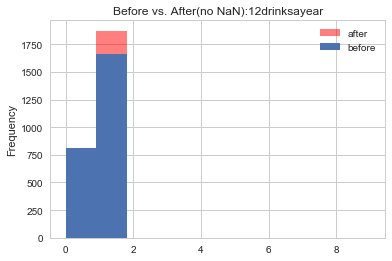

In [18]:
df = fill_NaN(df,'12drinksayear','mode')
# get_value_count(df,'12drinksayear')
print(df['12drinksayear'].value_counts())
get_cstr_ratio(df,'12drinksayear',[7,9])
df = process_cstr(df,'12drinksayear',[7,9],'drop')
# get_value_count(df0,'12drinksayear')
# get_value_count(df,'12drinksayear')

#### A.2. '5drinksaday'  
Ever have 4/5 or more drinks every day? - codes

In [19]:
get_NaN_ratio(df,'5drinksaday')
get_value_count(df,'5drinksaday')
df = process_cstr(df,'5drinksaday',[7,9],'drop')


The NaN ratio in 5drinksaday is 0.248
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

NaN    667
0.0    1657
1.0     361
7.0       1
Name: 5drinksaday, dtype: int64



Predict the missing values of 5drinksaday using  knn  Classifier...
Features used for predicting 5drinksaday are: ['12drinksayear', 'age', 'diabetes', 'gender', 'race']
The number of predicted values: 667

NaN    0
0.0    2293
1.0     392
Name: 5drinksaday, dtype: int64


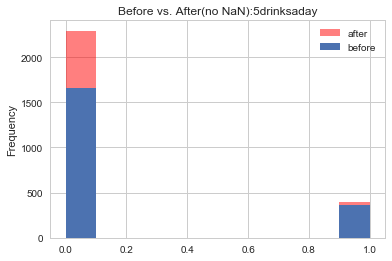

In [20]:
x_a2 = [col for col in df.columns if df[col].notnull().all()]
y_a2 = '5drinksaday'
predict_NaN_with_ML(df,x_a2,y_a2,'categorical','knn')
get_value_count(df,'5drinksaday')

#### A.3. '5drinks2hours'
During the past 30 days, # days have 4/5 or more drinks in 2 hrs

In [21]:
get_NaN_ratio(df,'5drinks2hours')
get_value_count(df,'5drinks2hours')
df = process_cstr(df,'5drinks2hours',[777,999],'drop')


The NaN ratio in 5drinks2hours is 0.760
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

NaN    2040
0.0      522
1.0       60
4.0       18
3.0       15
20.0       8
5.0        8
6.0        3
10.0       3
999.0      2
8.0        2
7.0        1
12.0       1
18.0       1
15.0       1
Name: 5drinks2hours, dtype: int64



Predict the missing values of 5drinks2hours using  knn  Classifier...
Features used for predicting 5drinks2hours are: ['12drinksayear', '5drinksaday', 'age', 'diabetes', 'gender', 'race']
The number of predicted values: 2040

NaN    0
0.0     2522
1.0       99
4.0       19
3.0       15
20.0       8
5.0        8
6.0        3
10.0       3
8.0        2
7.0        1
12.0       1
18.0       1
15.0       1
Name: 5drinks2hours, dtype: int64


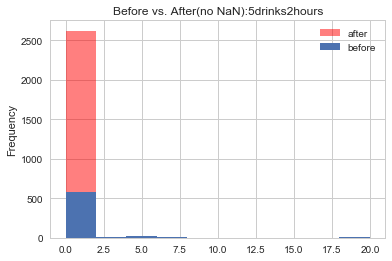

In [22]:
x_a3 = [col for col in df.columns if df[col].notnull().all()]
y_a3 = '5drinks2hours'

# ???
# 5drinks2hours is not a categorical variable, range of integer values(0-18) & code(20) 
predict_NaN_with_ML(df,x_a3,y_a3,'categorical','knn')
get_value_count(df,'5drinks2hours')

### B. Body Measures - BMI
* numerical variable with no cstr
    * below 18.5 – underweight 
    * between 18.5 and 24.9 – healthy weight range
    * between 25 and 29.9 - overweight (diabetes risk factor)


The NaN ratio in BMI is 0.011
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    2683.000000
mean       29.269141
std         6.950431
min        15.100000
25%        24.300000
50%        28.300000
75%        33.000000
max        64.500000
Name: BMI, dtype: float64

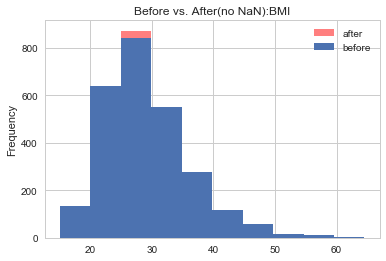

In [23]:
get_NaN_ratio(df,'BMI')
fill_NaN(df,'BMI','mean')
df['BMI'].describe()

* comment: only ~25% participants are in the underweight - health weight range; more than half of people are overweight (diabetes risk factor)

### C. Demographics - race, age, gender
* age > 45 - diabetes risk factor

In [24]:
# get dummies for categorical variables with a few categories

# function:  convert_nominal_to_dummies(df,col_name,dummies_name)
# purpose:   convert the target column from a ***nominal variable*** (ex: gender -> male/female)
#            to dummies variables (male: 1/0, female: 1/0)
# input:     df: dataframe containing the nominal column
#            col_name: the name of the nominal col: 'gender' - a string
#            dummies_name: a list, with names of the dummies:
#                          ex: in gender, 1 = male, 2 = female, dummies_name = ['male','female']
#                          need to consider 7/9 in dummies_name, either drop 77/99 before calling this function
#                          or will have two additional dummy columns for 77/99
# output:    df with nominal col converted to dummies

def convert_nominal_to_dummies(df,col_name,dummies_name):
    dummy = pd.get_dummies(df[col_name])
    dummy.columns = dummies_name
    df = pd.merge(df, dummy, on = 'ID', left_index = True, sort = False)
    df = df.drop([col_name],axis=1)
    return df

In [25]:
df = convert_nominal_to_dummies(df,'gender',['male','female'])
df.head()

,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diaBP1,diaBP2,diaBP3,diabetes,fasting_glucose,race,sitting,sleeping,sugar,sysBP1,sysBP2,sysBP3,male,female
ID,,,,,,,,,,,,,,,,,,,,
83733.0,1.0,0.0,1.0,30.8,173.0,53.0,88.0,88.0,82.0,2.0,5.59,3.0,300.0,8.0,NaN,146.0,140.0,134.0,1,0
83734.0,1.0,0.0,1.0,28.8,145.0,78.0,46.0,44.0,46.0,1.0,4.66,3.0,480.0,7.0,NaN,138.0,132.0,136.0,1,0
83736.0,0.0,0.0,0.0,20.3,142.0,42.0,70.0,54.0,56.0,2.0,4.66,4.0,540.0,NaN,NaN,100.0,114.0,98.0,0,1
83737.0,0.0,0.0,0.0,28.6,103.0,72.0,58.0,58.0,60.0,2.0,5.93,1.0,10.0,9.0,NaN,116.0,122.0,120.0,0,1
83741.0,1.0,0.0,1.0,28.0,102.0,22.0,70.0,74.0,74.0,2.0,5.27,4.0,540.0,6.5,NaN,110.0,112.0,112.0,1,0


In [26]:
# Check for NaN 
get_NaN_ratio(df,'age')
get_NaN_ratio(df,'race')
get_NaN_ratio(df,'male')
get_NaN_ratio(df,'female')


The NaN ratio in age is 0.000
No missing values detected

The NaN ratio in race is 0.000
No missing values detected

The NaN ratio in male is 0.000
No missing values detected

The NaN ratio in female is 0.000
No missing values detected


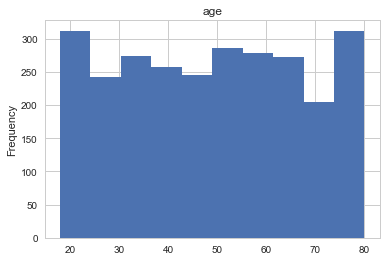

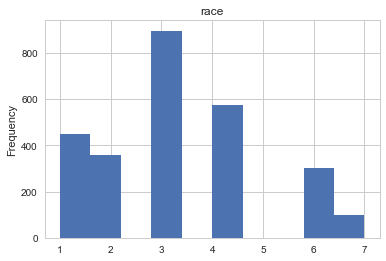

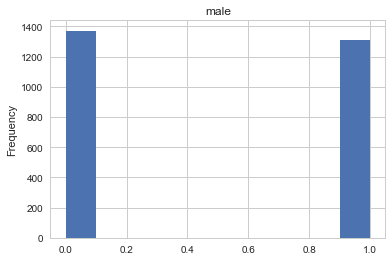

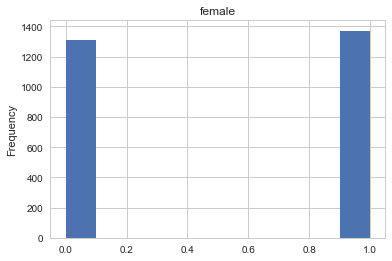

In [27]:
plot_feature('age')
plot_feature('race')
plot_feature('male')
plot_feature('female')

### D. Diabetes
* 3 means borderline

In [28]:
# Change 2(NHANES for No) to 0(False - boolean) for features with YES/NO answers
df.loc[df['diabetes'] == 2,['diabetes']] = 0
df['diabetes'].value_counts()
df = process_cstr(df,feature='diabetes',method='drop',cstr=[7,9])

In [29]:
get_NaN_ratio(df,'diabetes')
df['diabetes'].value_counts()


The NaN ratio in diabetes is 0.000
No missing values detected


0.0    2226
1.0     391
3.0      64
Name: diabetes, dtype: int64

In [30]:
db_counts = df['diabetes'].value_counts().to_dict()
percentage_yes_db = db_counts[1.0]/df['diabetes'].shape[0]
percentage_pre_db = db_counts[3.0]/df['diabetes'].shape[0]
percentage_no_db = db_counts[0.0]/df['diabetes'].shape[0]
print(percentage_yes_db*100,'% people have diabetes')
print(percentage_pre_db*100,'% people are pre diabetes')
print(percentage_no_db*100,'% people do not have diabetes')

14.584110406564715 % people have diabetes
2.3871689668034315 % people are pre diabetes
83.02872062663185 % people do not have diabetes


* Drop prediabetes for now ???

In [31]:
df = df[df['diabetes'] != 3.0]
df['diabetes'].value_counts()

0.0    2226
1.0     391
Name: diabetes, dtype: int64

### E. Dietary supplement - sugar
* average daily total sugar intakes(grams) from DS and antacids (in addition to sugar intake from food???)
* According to the American Heart Association (AHA), the maximum amount of added sugars you should eat in a day are :

    - Men: 150 calories per day (37.5 grams or 9 teaspoons)
    - Women: 100 calories per day (25 grams or 6 teaspoons)

In [32]:
# Check for NaN 
get_NaN_ratio(df,'sugar')
df['sugar'].describe()


The NaN ratio in sugar is 0.912
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)


count    231.000000
mean       1.980866
std        2.127414
min        0.020000
25%        0.400000
50%        1.400000
75%        3.000000
max       12.000000
Name: sugar, dtype: float64


Predict the missing values of sugar using  knn  Regressor...
Features used for predicting sugar are: ['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age', 'diabetes', 'race', 'male', 'female']
The number of predicted values: 2386


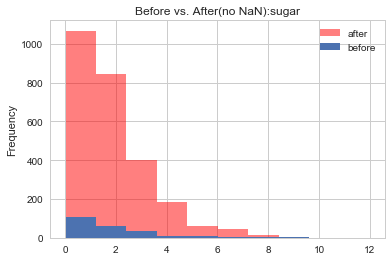

In [33]:
x_sugar = [col for col in df.columns if df[col].notnull().all()]
predict_NaN_with_ML(df,data_type='numerical',model='knn',x=x_sugar,y='sugar')

### F. Plasma fasting glucose
The fasting plasma glucose test (FPG) is the preferred method of screening for diabetes. The FPG measures a person's blood sugar level after fasting or not eating anything for at least 8 hours. 
- The global mean fasting plasma blood glucose level in humans is about 5.5 mmol/L (100 mg/dL); however, this level fluctuates throughout the day.
- FPG test results:
    - normal: less than 5.6 mmol/L 
    - prediabetes: 5.6 ~ 6.9 mmol/L
    - diabetes: 7 mmol/L or higher (on two separate tests)


The NaN ratio in fasting_glucose is 0.056
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


count    2617.000000
mean        6.265834
std         2.223393
min         1.170000
25%         5.270000
50%         5.720000
75%         6.265834
max        26.600000
Name: fasting_glucose, dtype: float64

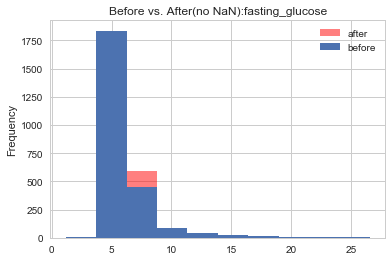

In [34]:
get_NaN_ratio(df,'fasting_glucose')
df = fill_NaN(df,'fasting_glucose','mean')
df['fasting_glucose'].describe()

In [35]:
no_db = len(df[(df['fasting_glucose'] < 5.6)])
pre1 = df['fasting_glucose'] >= 5.6
pre2 = df['fasting_glucose'] < 7
pre_db = len(df['fasting_glucose'][pre1 & pre2])
yes_db = len(df[(df['fasting_glucose'] >= 7)])
total = df['fasting_glucose'].shape[0]
print('normal:',no_db/total*100,'%')
print('prediabetes:',pre_db/total*100,'%')
print('diabetes:',yes_db/total*100,'%')

normal: 42.911730989682844 %
prediabetes: 43.828811616354606 %
diabetes: 13.259457393962554 %


Prediabetes is a serious health condition where blood sugar levels are higher than normal, but not high enough yet to be diagnosed as type 2 diabetes. Approximately 84 million American adults—more than 1 out of 3—have prediabetes. Healthy lifestyle choices can help you prevent prediabetes and its progression to type 2 diabetes

### G & H. Sleeping disorders - Sleeping (sleeping hours) & Physical activity - Sitting (sedatary minutes)
- Convert sleeping hours/day and sedatary minutes/day into same scale --> hours/day 

In [36]:
get_cstr_ratio(df,'sitting',[7777,9999])
df = process_cstr(df,'sitting',[7777,9999],'drop')


The ratio of [dont know] is 0.00038211692777990065
The ratio of [refuse] is 0.00611387084447841
Now call: process_cstr(df,feature,cstr,method)


In [37]:
df['sitting'] = df['sitting']/60


The NaN ratio in sitting is 0.002
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

The NaN ratio in sleeping is 0.004
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


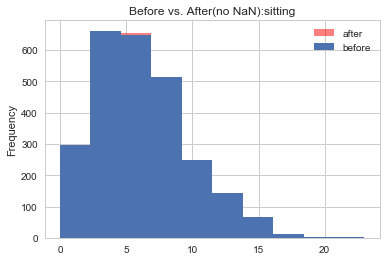

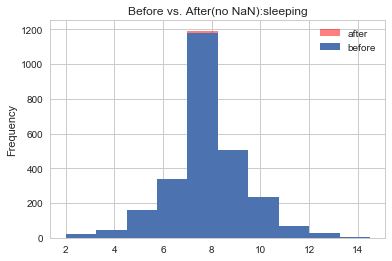

In [38]:
# Check for NaN 
get_NaN_ratio(df,'sitting')
get_NaN_ratio(df,'sleeping')

# Replace NaN with mean
df = fill_NaN(df,'sitting','mean')
df = fill_NaN(df,'sleeping','mean')

### I. Cholesterol - LDL
- cholesterol (mg/dL) - values: 23 to 277
- LDL stands for low-density lipoproteins. It is sometimes called the "bad" cholesterol because a high LDL level leads to a buildup of cholesterol in your arteries. This extra LDL, along with other substances, forms plaque.
- Diabetes tends to lower HDL levels and raise triglyceride and LDL levels, which increases the risk for heart disease and stroke. 

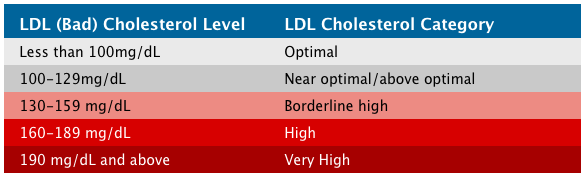


The NaN ratio in LDL is 0.138
Since NaN ratio is large, predict NaN using ML or check predictability first...
if check predictability, call: check_predictability_all/some_x(df,y,method)
if predict using ML, call: predict_NaN_with_ML(df,x,y,data_type,model)

Predict the missing values of LDL using  knn  Regressor...
Features used for predicting LDL are: ['12drinksayear', '5drinks2hours', '5drinksaday', 'BMI', 'age', 'diabetes', 'fasting_glucose', 'race', 'sitting', 'sleeping', 'sugar', 'male', 'female']
The number of predicted values: 360


count    2600.000000
mean      111.505577
std        34.764603
min        23.000000
25%        87.000000
50%       109.000000
75%       132.000000
max       277.000000
Name: LDL, dtype: float64

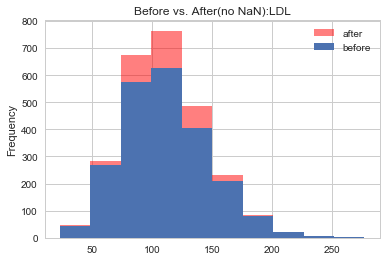

In [39]:
# Check for NaN 
get_NaN_ratio(df,'LDL')
x_LDL = [col for col in df.columns if df[col].notnull().all()]
predict_NaN_with_ML(df,x_LDL,'LDL','numerical','knn')
df['LDL'].describe()

* Change numerical variable LDL into a categorical variable with 3 codes: 
    - 1: Optimal         < 100 mg/dL
    - 2: Borderline      100 ~ 160 mg/dL
    - 3: High            > 160 mg/dL

In [40]:
df.loc[df['LDL'] < 100,['LDL']] = 1
df.loc[(df['LDL'] >= 100) & (df['LDL'] <= 160),['LDL']] = 2
df.loc[df['LDL'] > 160,['LDL']] = 3
df['LDL'].value_counts()

2.0    1358
1.0    1007
3.0     235
Name: LDL, dtype: int64

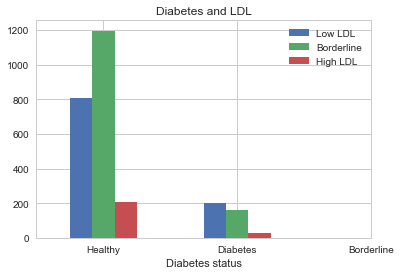

In [41]:
plot_feature('LDL')
%matplotlib inline
pd.crosstab(df.diabetes,df.LDL).plot(kind='bar')
plt.title('Diabetes and LDL')
bars = ('Healthy','Diabetes','Borderline')
pos = np.arange(len(bars))
plt.xticks(pos,bars,rotation='horizontal')
plt.xlabel('Diabetes status')
plt.legend(['Low LDL','Borderline','High LDL'])

plasma LDL cholesterol level is usually normal in type 2 diabetic patients, LDLs show a significant increase in their plasma residence time which may promote cholesterol deposition in the arterial wall. 
https://www.ncbi.nlm.nih.gov/pubmed/19650852

### J. Blood Pressure

* High blood pressure, or hypertension, is a condition that’s seen in people with type 2 diabetes. It’s unknown why there’s such a significant relationship between the two diseases. It’s believed that the following contribute to both conditions:

    - obesity
    - a diet high in fat and sodium
    - chronic inflammation
    - inactivity

* The combination of high blood pressure and type 2 diabetes is particularly lethal and can significantly raise your risk of having a heart attack or stroke. 
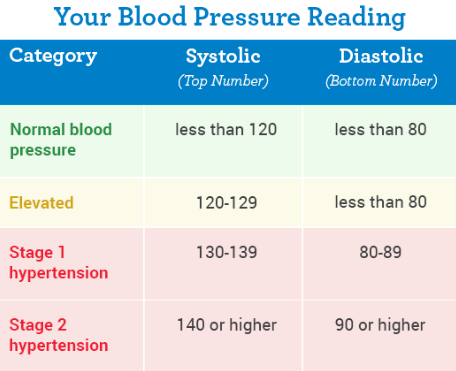

In [42]:
# 1. Obtain average systolic and diastolic pressure values from the multiple measurements
df['sysBP'] = (df['sysBP1']+df['sysBP2']+df['sysBP3'])/3
df['diaBP'] = (df['diaBP1']+df['diaBP2']+df['diaBP3'])/3
df = df.drop(['sysBP1','diaBP1','sysBP2','diaBP2','sysBP3','diaBP3'], axis=1)
df.head()

,12drinksayear,5drinks2hours,5drinksaday,BMI,LDL,age,diabetes,fasting_glucose,race,sitting,sleeping,sugar,male,female,sysBP,diaBP
ID,,,,,,,,,,,,,,,,
83733.0,1.0,0.0,1.0,30.8,3.0,53.0,0.0,5.59,3.0,5.000000,8.000000,0.750,1,0,140.000000,86.000000
83734.0,1.0,0.0,1.0,28.8,2.0,78.0,1.0,4.66,3.0,8.000000,7.000000,1.600,1,0,135.333333,45.333333
83736.0,0.0,0.0,0.0,20.3,2.0,42.0,0.0,4.66,4.0,9.000000,7.718424,2.750,0,1,104.000000,60.000000
83737.0,0.0,0.0,0.0,28.6,2.0,72.0,0.0,5.93,1.0,0.166667,9.000000,0.070,0,1,119.333333,58.666667
83741.0,1.0,0.0,1.0,28.0,2.0,22.0,0.0,5.27,4.0,9.000000,6.500000,1.085,1,0,111.333333,72.666667



The NaN ratio in sysBP is 0.057
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)

The NaN ratio in diaBP is 0.057
Since NaN ratio is small, fill NaN directly with fill type: mode, mean, new category
Now call function: fill_NaN(df, feature, fill_type)


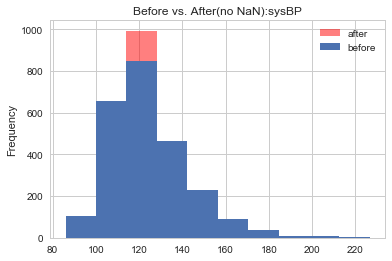

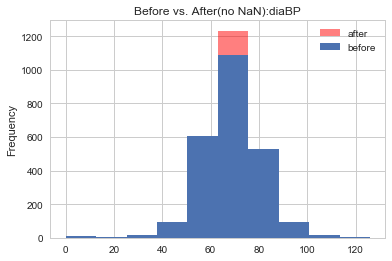

In [43]:
# Check for NaN in sysBP and diaBP
get_NaN_ratio(df,'sysBP')
get_NaN_ratio(df,'diaBP')

# Since NaN ratios are small, replace NaN with mean values
df = fill_NaN(df,'sysBP','mean')
df = fill_NaN(df,'diaBP','mean')

## SUMMARY

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2600 entries, 83733.0 to 93697.0
Data columns (total 16 columns):
12drinksayear      2600 non-null float64
5drinks2hours      2600 non-null float64
5drinksaday        2600 non-null float64
BMI                2600 non-null float64
LDL                2600 non-null float64
age                2600 non-null float64
diabetes           2600 non-null float64
fasting_glucose    2600 non-null float64
race               2600 non-null float64
sitting            2600 non-null float64
sleeping           2600 non-null float64
sugar              2600 non-null float64
male               2600 non-null uint8
female             2600 non-null uint8
sysBP              2600 non-null float64
diaBP              2600 non-null float64
dtypes: float64(14), uint8(2)
memory usage: 309.8 KB


### Export dataframe as a csv file

In [45]:
df.to_csv('Diabetes Project Part 1.csv',index=False,sep=',')